In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
%matplotlib inline

In [8]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
#importing csv file by Pandas
df = pd.read_csv('3.csv')

In [10]:
#original shape of the dataframe
df.shape

(14900, 64)

In [11]:
#list of original dataframe features
df.columns

Index(['SUBJID', 'SAMPID', 'SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS',
       'SMTSD', 'SMUBRID', 'SMTSISCH', 'SMTSPAX', 'SMNABTCH', 'SMNABTCHT',
       'SMNABTCHD', 'SMGEBTCH', 'SMGEBTCHD', 'SMGEBTCHT', 'SMAFRZE', 'SMGTC',
       'SME2MPRT', 'SMCHMPRS', 'SMNTRART', 'SMNUMGPS', 'SMMAPRT', 'SMEXNCRT',
       'SM550NRM', 'SMGNSDTC', 'SMUNMPRT', 'SM350NRM', 'SMRDLGTH', 'SMMNCPB',
       'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD', 'SMNTERRT', 'SMRRNANM',
       'SMRDTTL', 'SMVQCFL', 'SMMNCV', 'SMTRSCPT', 'SMMPPDPR', 'SMCGLGTH',
       'SMGAPPCT', 'SMUNPDRD', 'SMNTRNRT', 'SMMPUNRT', 'SMEXPEFF', 'SMMPPDUN',
       'SME2MMRT', 'SME2ANTI', 'SMALTALG', 'SME2SNSE', 'SMMFLGTH', 'SME1ANTI',
       'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE', 'SME1PCTS', 'SMRRNART', 'SME1MPRT',
       'SMNUM5CD', 'SMDPMPRT', 'SME2PCTS'],
      dtype='object')

In [12]:
#finding unique values of all features and getting a sense of how many of them are there!

print('feature name, # 0f unique values')
for feature in df.columns:
    print(feature,len(df[feature].unique()))

feature name, # 0f unique values
SUBJID 752
SAMPID 14900
SMATSSCR 5
SMCENTER 9
SMPTHNTS 7969
SMRIN 56
SMTS 31
SMTSD 51
SMUBRID 50
SMTSISCH 1654
SMTSPAX 1183
SMNABTCH 1418
SMNABTCHT 13
SMNABTCHD 712
SMGEBTCH 270
SMGEBTCHD 201
SMGEBTCHT 11
SMAFRZE 5
SMGTC 380
SME2MPRT 11850
SMCHMPRS 23
SMNTRART 11984
SMNUMGPS 1
SMMAPRT 11752
SMEXNCRT 12074
SM550NRM 1
SMGNSDTC 5691
SMUNMPRT 2
SM350NRM 1
SMRDLGTH 3
SMMNCPB 1
SME1MMRT 12097
SMSFLGTH 333
SMESTLBS 2
SMMPPD 12100
SMNTERRT 12097
SMRRNANM 12045
SMRDTTL 12100
SMVQCFL 12088
SMMNCV 1
SMTRSCPT 5747
SMMPPDPR 12102
SMCGLGTH 1
SMGAPPCT 1
SMUNPDRD 2
SMNTRNRT 12097
SMMPUNRT 11752
SMEXPEFF 12091
SMMPPDUN 12100
SME2MMRT 12097
SME2ANTI 12096
SMALTALG 12098
SME2SNSE 12098
SMMFLGTH 388
SME1ANTI 12097
SMSPLTRD 12099
SMBSMMRT 12098
SME1SNSE 12097
SME1PCTS 11725
SMRRNART 12097
SME1MPRT 11622
SMNUM5CD 1
SMDPMPRT 2
SME2PCTS 11604


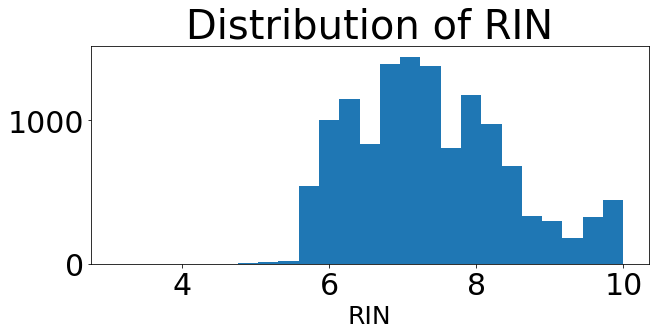

In [24]:
#Understanding the distribution of RIN
fig, ax = plt.subplots(figsize = (10,4))
ax.hist(df['SMRIN'], bins=25, stacked = False )
ax.set_xlabel('RIN', size = 25)
ax.set_title('Distribution of RIN', size = 40)
ax.tick_params(axis='both', which='major', labelsize=30);

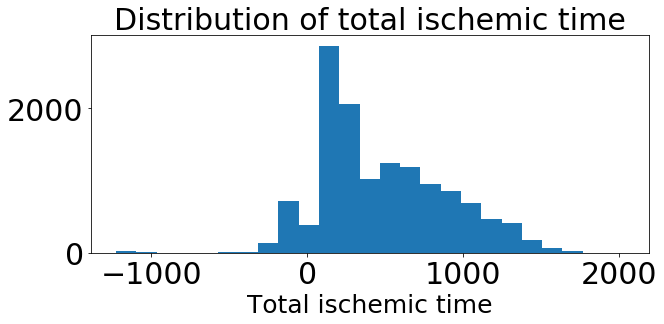

In [29]:
fig, ax = plt.subplots(figsize = (10,4))
ax.hist(df['SMTSISCH'], bins=25, stacked = False )
ax.set_title('Distribution of total ischemic time', size = 30)
ax.set_xlabel('Total ischemic time', size = 25)
ax.tick_params(axis='both', which='major', labelsize=30);

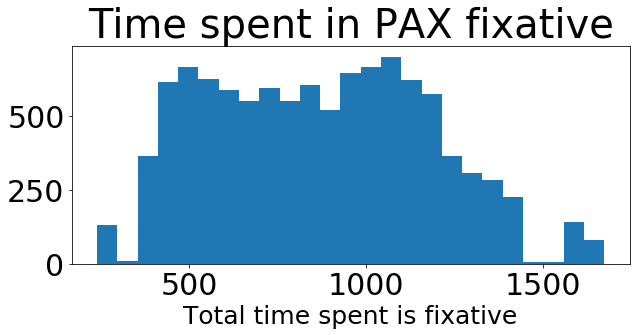

In [32]:
fig, ax = plt.subplots(figsize = (10,4))
ax.hist(df['SMTSPAX'], bins=25, stacked = False )
ax.set_title('Time spent in PAX fixative', size = 40)
ax.set_xlabel('Total time spent is fixative', size = 25)
ax.tick_params(axis='both', which='major', labelsize=30);


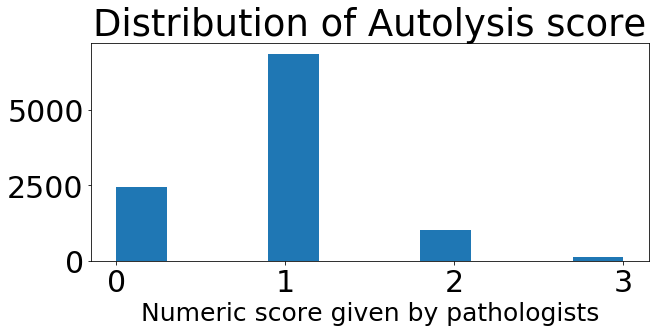

In [42]:
fig, ax = plt.subplots(figsize = (10,4))
ax.hist(df['SMATSSCR'], bins=10, stacked = False )
ax.set_title('Distribution of Autolysis score', size = 37)
ax.set_xlabel('Numeric score given by pathologists', size = 25)
ax.tick_params(axis='both', which='major', labelsize=30);


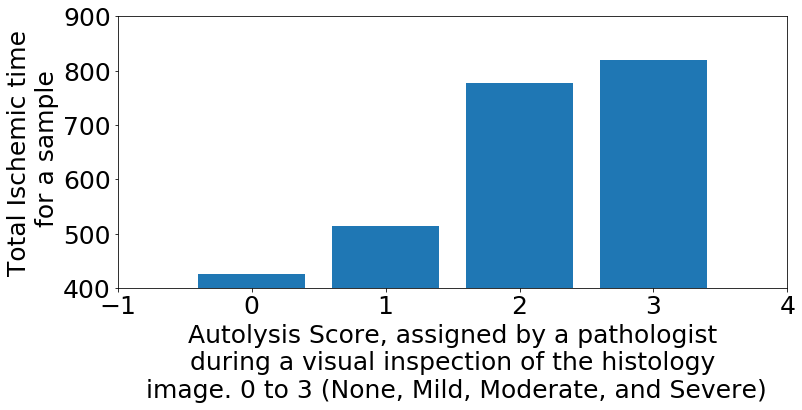

In [51]:
# plotting Total Ischemic time vs. Autolysis score
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(df.groupby('SMATSSCR').mean().index, df.groupby('SMATSSCR').mean()['SMTSISCH'])
ax.set_ylim(400,900)
ax.set_xlim(-1,4)
ax.set_xlabel('Autolysis Score, assigned by a pathologist\nduring a visual inspection of the histology\n image. 0 to 3 (None, Mild, Moderate, and Severe)', size = 25)
ax.set_ylabel('Total Ischemic time\n for a sample', size = 25)
ax.tick_params(axis='both', which='major', labelsize=25);


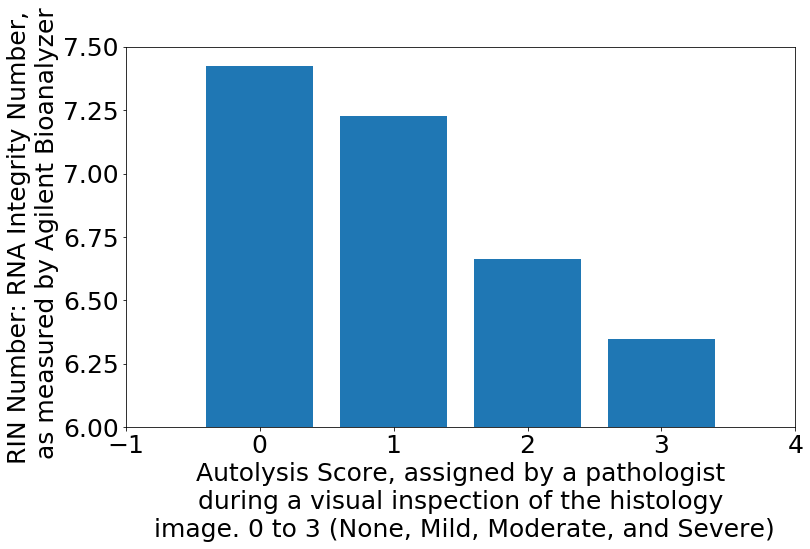

In [57]:
# plotting Autolysis score vs. RIN number
fig, ax = plt.subplots(figsize = (12,7))
ax.bar(df.groupby('SMATSSCR').mean().index, df.groupby('SMATSSCR').mean()['SMRIN'])
ax.set_ylim(6,7.5)
ax.set_xlim(-1,4)
ax.set_xlabel('Autolysis Score, assigned by a pathologist\nduring a visual inspection of the histology\n image. 0 to 3 (None, Mild, Moderate, and Severe)', size =25)
ax.set_ylabel('RIN Number: RNA Integrity Number,\n as measured by Agilent Bioanalyzer',size = 25)
ax.tick_params(axis='both', which='major', labelsize=25);


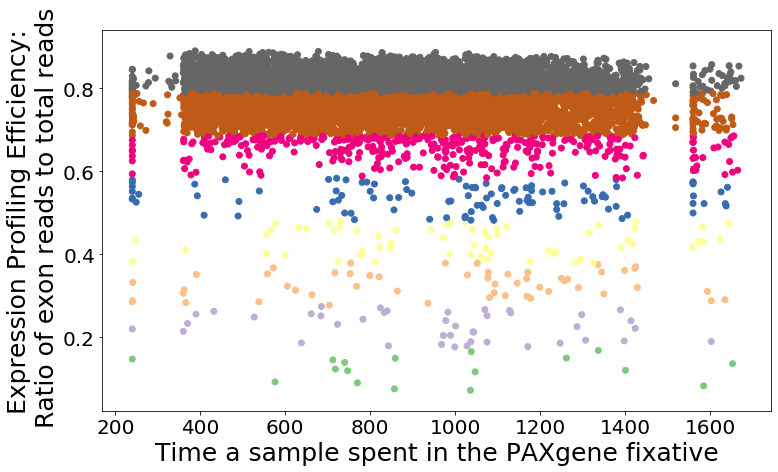

In [69]:
# plotting Time spent in PAX fixative vs. Expression Profiling Efficiency
fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(df['SMTSPAX'], df['SMEXPEFF'], c = df['SMEXPEFF'], cmap = 'Accent')
ax.set_xlabel('Time a sample spent in the PAXgene fixative', size = 25)
ax.set_ylabel('Expression Profiling Efficiency:\n Ratio of exon reads to total reads', size =25)
ax.tick_params(axis='both', which='major', labelsize=20);


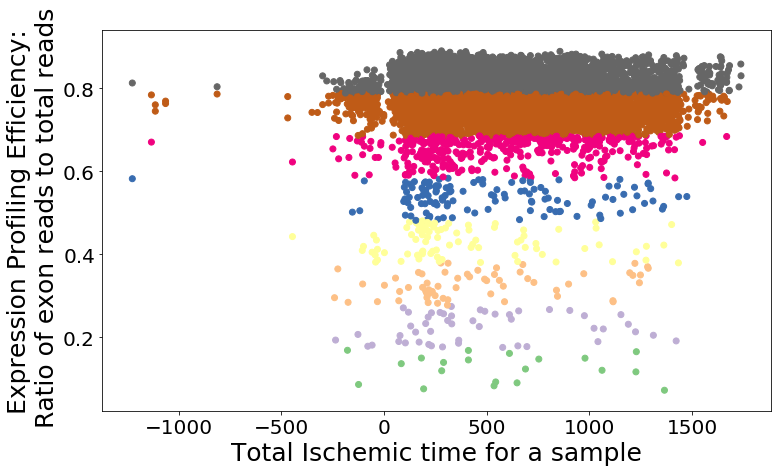

In [73]:
# plotting Total ischemic time vs. Expression Profiling Efficiency
fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(df['SMTSISCH'], df['SMEXPEFF'], c = df['SMEXPEFF'], cmap = 'Accent')
ax.set_xlabel('Total Ischemic time for a sample', size = 25)
ax.set_ylabel('Expression Profiling Efficiency:\n Ratio of exon reads to total reads', size = 25)
ax.tick_params(axis='both', which='major', labelsize=20);

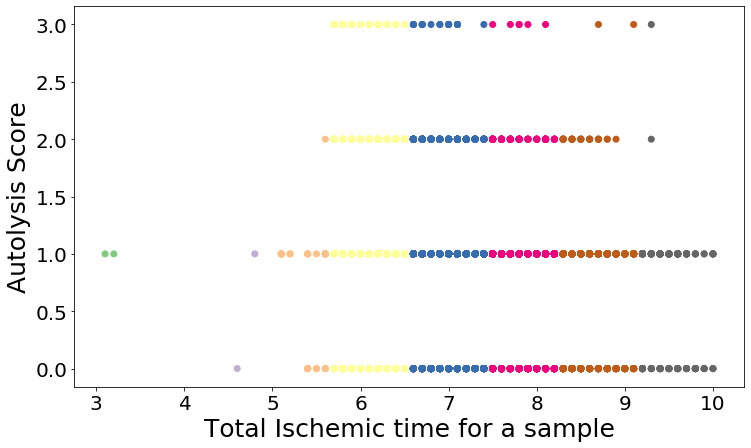

In [80]:
# plotting Total ischemic time vs. Autolysis score
fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(df['SMRIN'], df['SMATSSCR'], c = df['SMRIN'], cmap = 'Accent')
ax.set_xlabel('Total Ischemic time for a sample', size =25)
ax.set_ylabel('Autolysis Score', size = 25)
ax.tick_params(axis='both', which='major', labelsize=20);

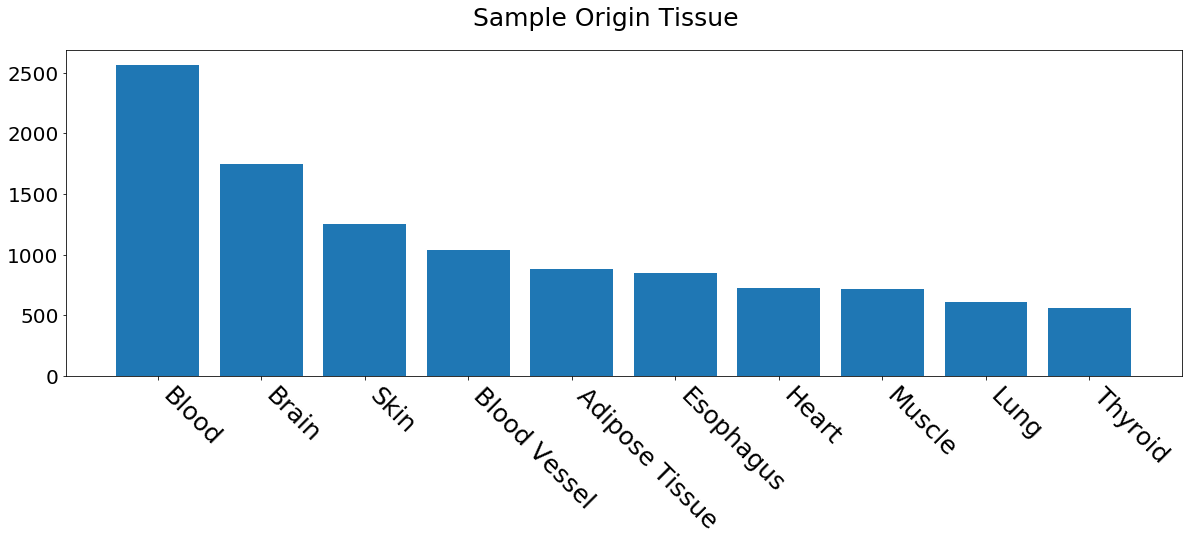

In [83]:
#plotting top 10 tissue that sample were taken from
SMTS_df = df.groupby('SMTS').count().sort_values('SUBJID', ascending = False).head(10)
SMTS_df.head(10)
fig, ax = plt.subplots(figsize= (20,6))
ax.bar(SMTS_df.index, height = SMTS_df['SUBJID'])
fig.suptitle('Sample Origin Tissue', fontsize=25)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=20)
ax.set_xticklabels(SMTS_df.index,rotation=-45, fontsize=25, ha = 'left');

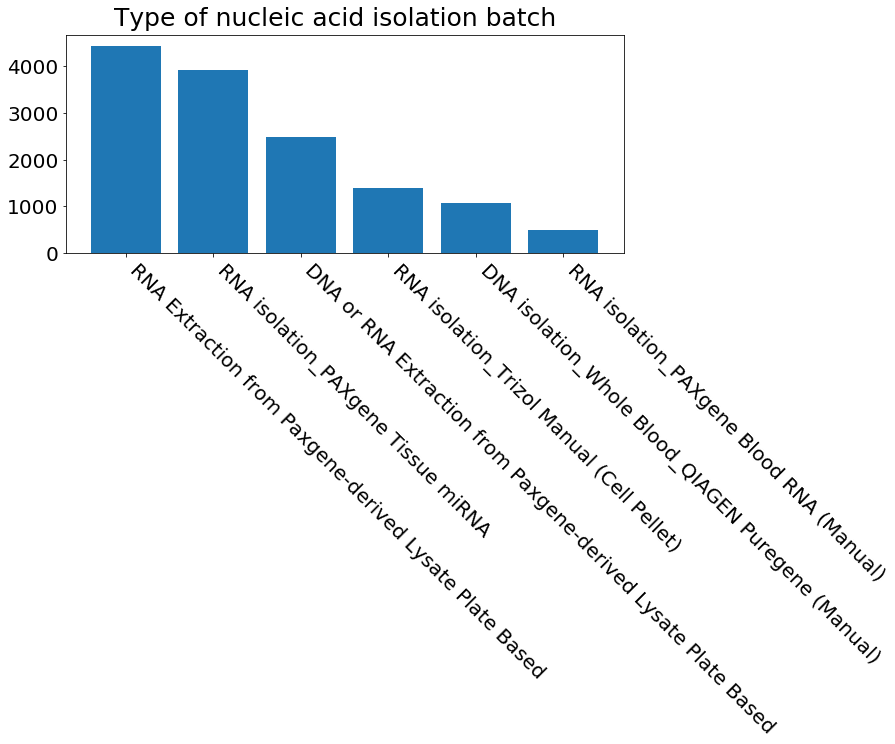

In [87]:
#plotting top 5 nucleic acid isolation batch
SMNABTCHT_df = df.groupby('SMNABTCHT').count().sort_values('SUBJID', ascending = False).head(6)
SMNABTCHT_df.head(5)
fig, ax = plt.subplots(figsize= (10,4))
ax.bar(SMNABTCHT_df.index, height = SMNABTCHT_df['SUBJID'])
fig.suptitle('Type of nucleic acid isolation batch', fontsize=25 )
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=20)
ax.set_xticklabels(SMNABTCHT_df.index,rotation=-45, fontsize=20, ha = 'left');

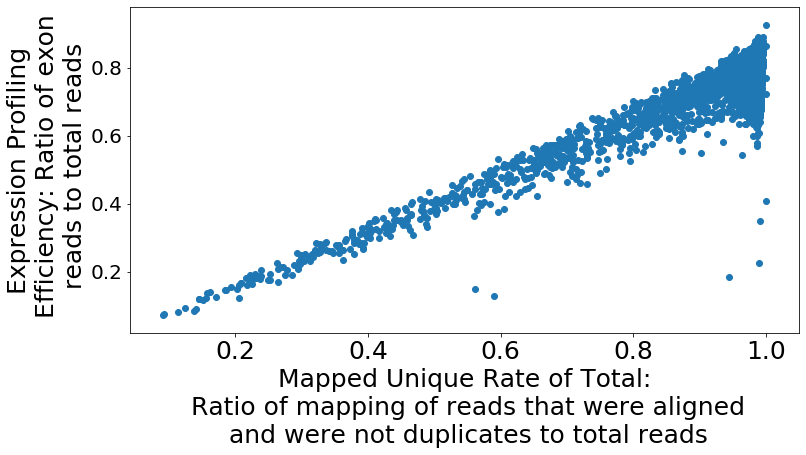

In [121]:
#plotting some correlations
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(df['SMMPUNRT'], df['SMEXPEFF'])
ax.set_xlabel('Mapped Unique Rate of Total:\n Ratio of mapping of reads that were aligned\n and were not duplicates to total reads', size = 25)
ax.set_ylabel('Expression Profiling\n Efficiency: Ratio of exon\n reads to total reads', size = 25);

In [90]:
#Some cleaning--- getting rid of all rows with nan values
df1 = df.iloc[:147,:]
df2 = df.iloc[160:7294,:]
df3 = df.iloc[8828:12365,:]
df4 = df.iloc[13375:13477,:]
df5 = df.iloc[13570:14674,:]
df6 = df.iloc[14768:14838,:]
df7 = df.iloc[14892:,:]
new_df = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis = 0)

In [91]:
new_df.shape

(12102, 64)

In [92]:
#list od feautres to be droped from new_df dataframe
columns_to_drop = ['SMMNCPB','SMNUM5CD', 'SMGAPPCT', 'SMCGLGTH', 'SMMNCV','SMCENTER','SMTSPAX','SMGTC','SMNUMGPS','SM550NRM', 'SM350NRM', 'SMPTHNTS']
# len(columns_to_drop)

In [93]:
new_df.drop(columns = columns_to_drop, inplace = True)

In [94]:
new_df.shape

(12102, 52)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

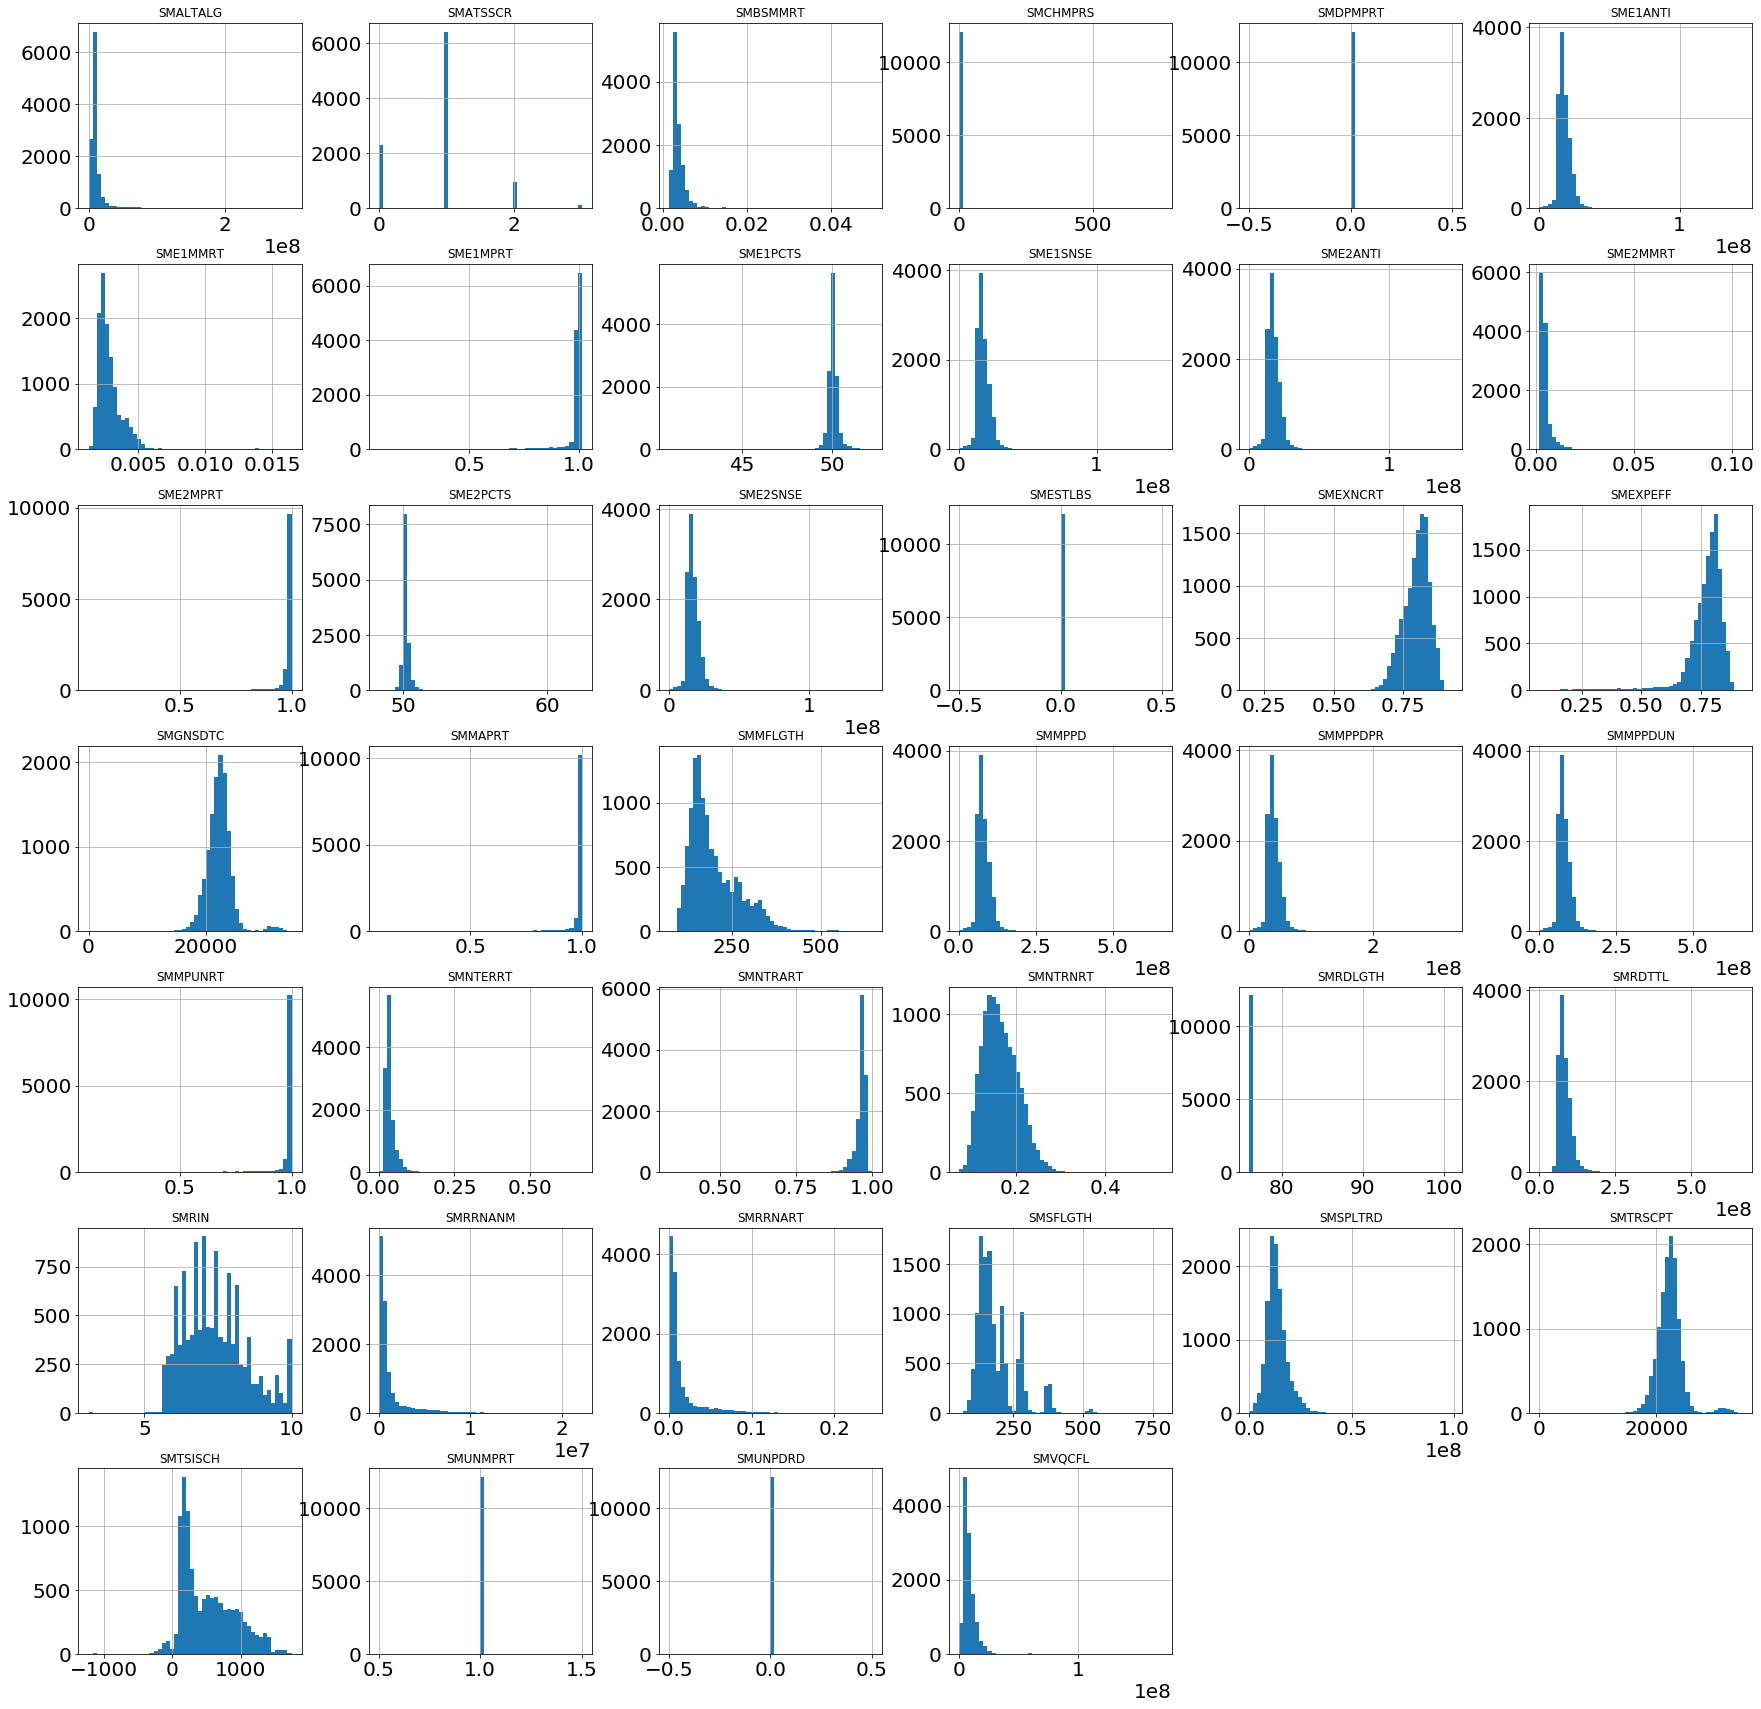

In [93]:
#plotting the histograms of the whole numeric data
new_df.hist(figsize= (30,30), bins = 50)
plt.tight_layout

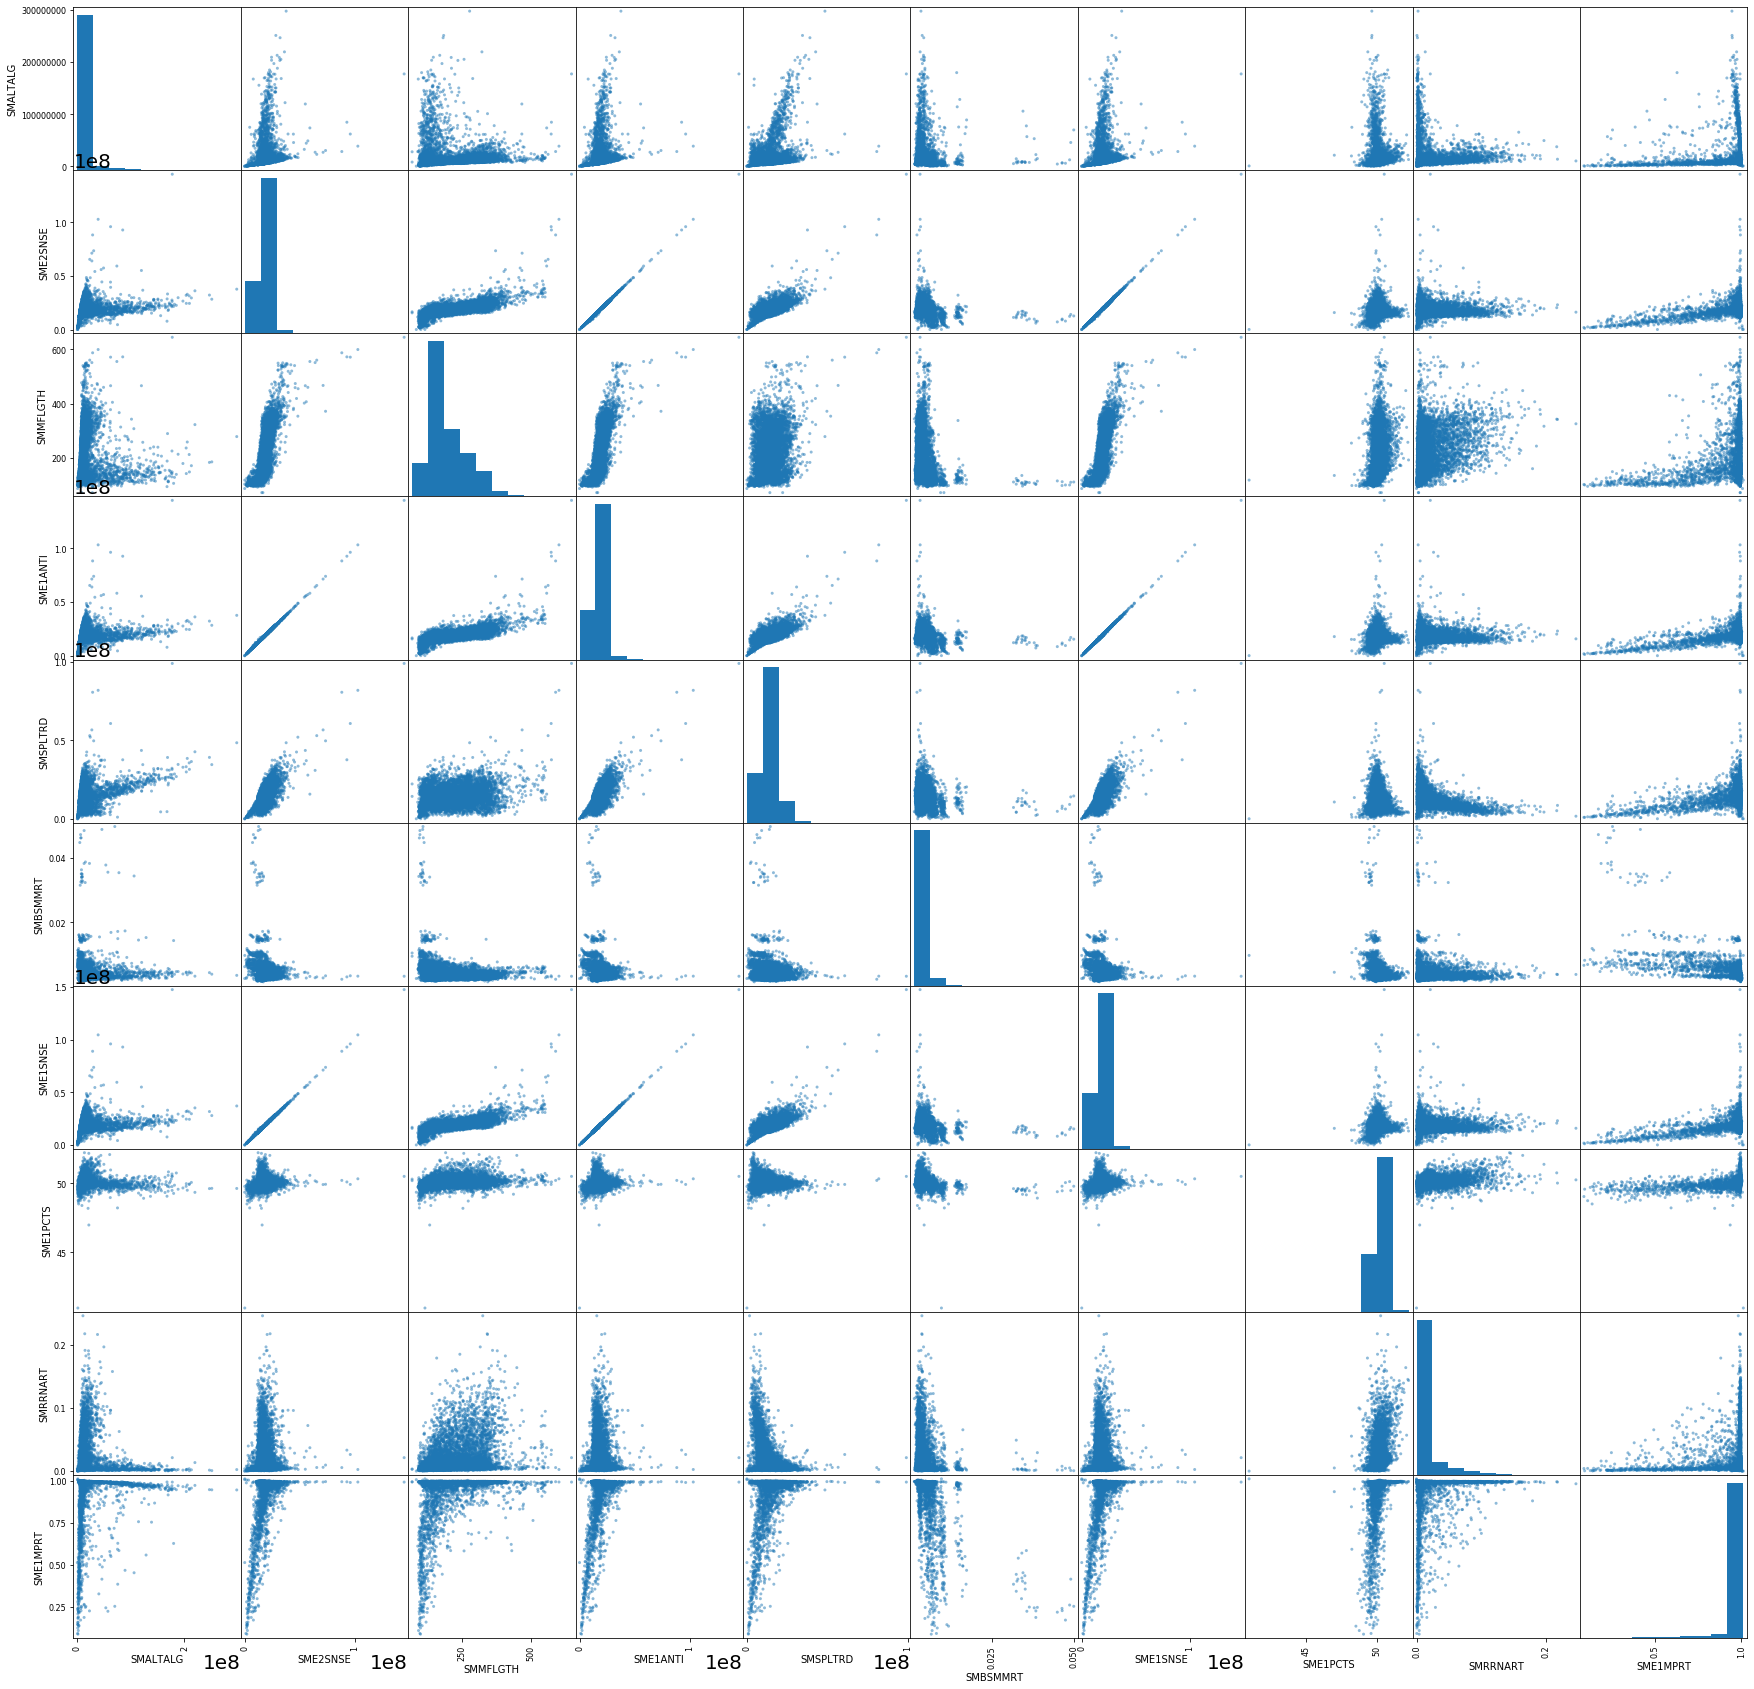

In [63]:
#plotting scatterplots for 10 numeric features
pd.plotting.scatter_matrix(new_df.iloc[:,40:50], figsize=(30,30));

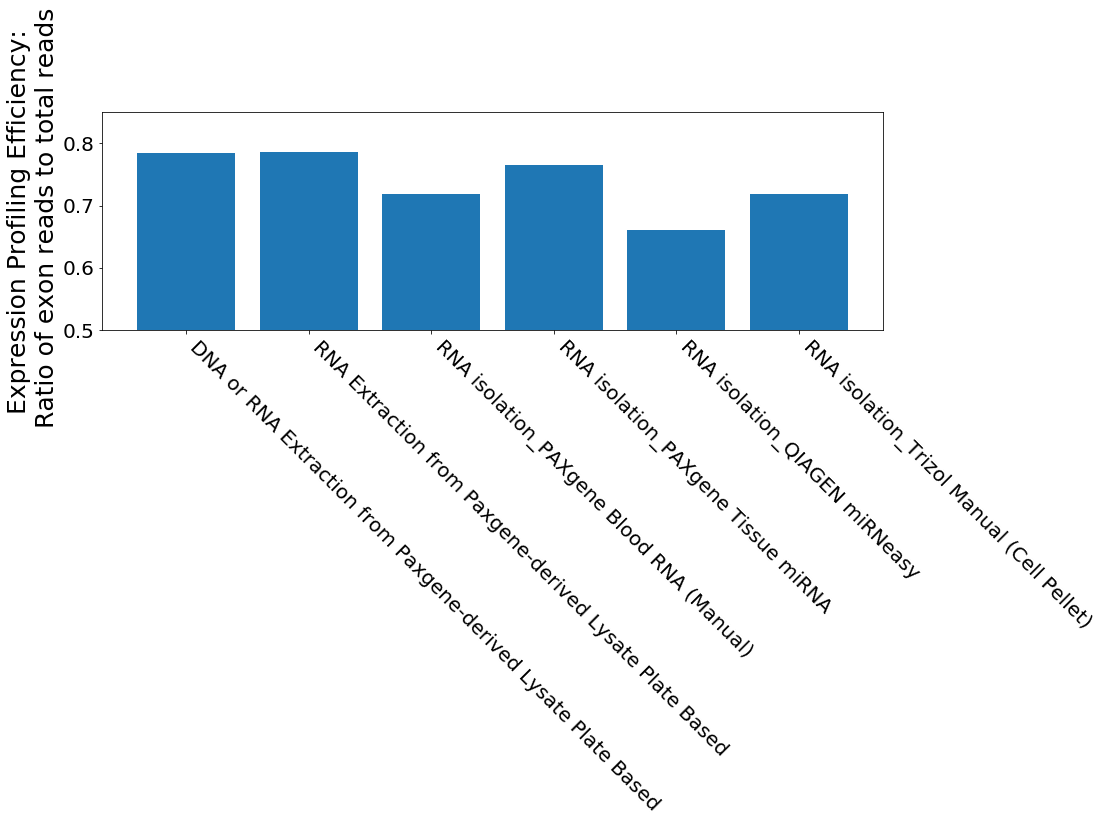

In [99]:
# plotting performance of top 6 methods
fig, ax = plt.subplots(figsize= (14,4))
ax.bar(new_df.groupby('SMNABTCHT').mean()['SMEXPEFF'].index, new_df.groupby('SMNABTCHT').mean()['SMEXPEFF'])
ax.set_ylabel('Expression Profiling Efficiency:\n Ratio of exon reads to total reads', size = 25)
ax.set_xticklabels(new_df.groupby('SMNABTCHT').mean()['SMEXPEFF'].index,rotation=-45, fontsize=20, ha = 'left')
ax.set_ylim(0.5,0.85);

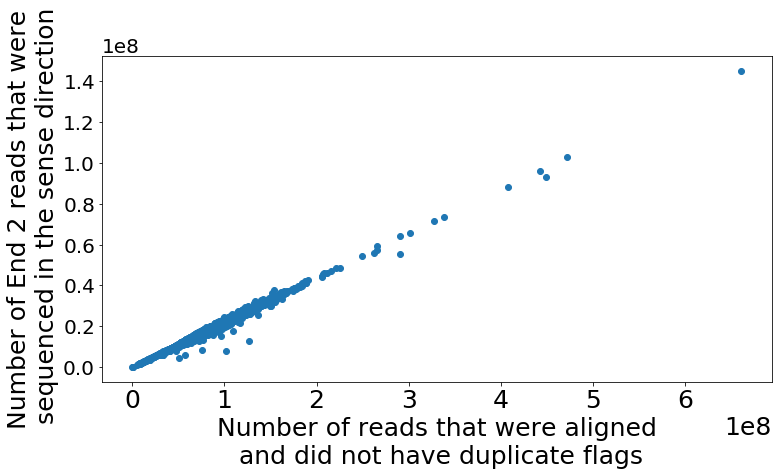

In [106]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(new_df['SMMPPDUN'], new_df['SME2SNSE'])
ax.set_xlabel('Number of reads that were aligned\n and did not have duplicate flags', size =25)
ax.set_ylabel('Number of End 2 reads that were\n sequenced in the sense direction', size = 25);

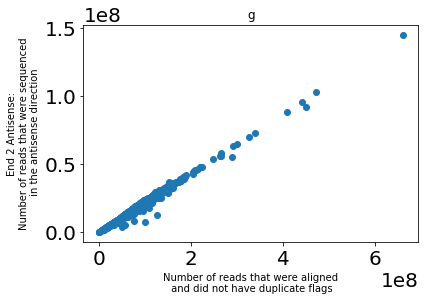

In [38]:
fig, ax = plt.subplots()
ax.scatter(new_df['SMMPPDUN'], new_df['SME2ANTI'])
ax.set_title('g')
ax.set_xlabel('Number of reads that were aligned\n and did not have duplicate flags')
ax.set_ylabel('End 2 Antisense:\nNumber of reads that were sequenced\n in the antisense direction');

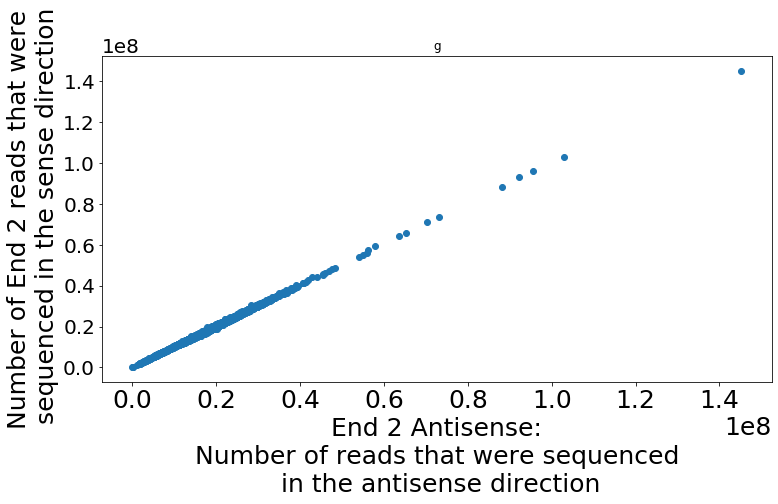

In [109]:
fig, ax = plt.subplots(figsize = (12,6))
ax.scatter(new_df['SME2ANTI'], new_df['SME2SNSE'])
ax.set_title('g')
ax.set_xlabel('End 2 Antisense:\nNumber of reads that were sequenced\n in the antisense direction', size = 25)
ax.set_ylabel('Number of End 2 reads that were\n sequenced in the sense direction', size =25);

In [111]:
hypo_df1 = new_df[['SMRIN','SMTSISCH']]

In [112]:
hypo_df1.dropna(how='any', inplace=True)

C:\Users\farza\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
hypo_df2 = hypo_df1[hypo_df1['SMTSISCH'] >= 0]


In [114]:
hypo_df_high = hypo_df2[hypo_df1['SMRIN'] >= 7.5]
hypo_df_low = hypo_df2[hypo_df1['SMRIN'] < 7.5]

C:\Users\farza\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\farza\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [115]:
low_RIN_samples = np.array(hypo_df_low['SMTSISCH'])
high_RIN_samples = np.array(hypo_df_high['SMTSISCH'])

In [116]:
low_RIN_samples.mean()

611.1205882352941

In [117]:
high_RIN_samples.mean()

410.5908029878618

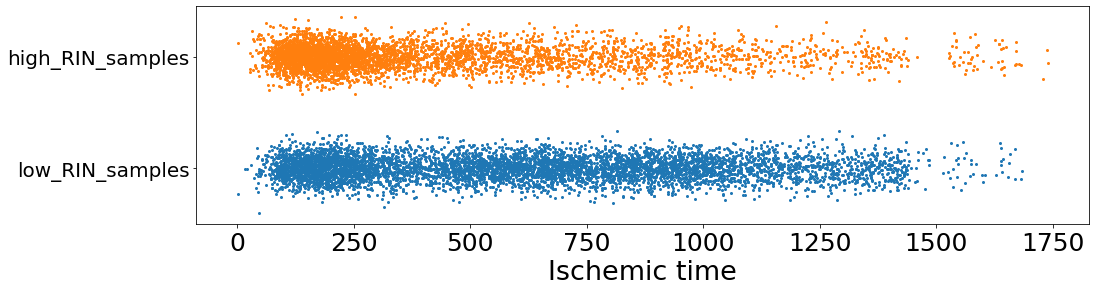

In [119]:
fig, ax = plt.subplots(1, figsize=(16, 4))

ax.scatter(low_RIN_samples, np.repeat(0, len(low_RIN_samples)) + np.random.normal(0, 0.1, len(low_RIN_samples)), s=4)
ax.scatter(high_RIN_samples, np.repeat(1, len(high_RIN_samples)) + np.random.normal(0, 0.1, len(high_RIN_samples)), s=4)
ax.set_yticks([0, 1])
ax.set_yticklabels(["low_RIN_samples", "high_RIN_samples"])
ax.set_xlabel('Ischemic time', size = 27);

In [74]:
def welch_test_statistic(low_RIN_samples, high_RIN_samples):
    numerator = np.mean(low_RIN_samples) - np.mean(high_RIN_samples)
    denominator_sq = (np.var(low_RIN_samples) / len(low_RIN_samples)) + (np.var(high_RIN_samples) / len(high_RIN_samples))
    return numerator / np.sqrt(denominator_sq)

In [75]:
test_statistic = welch_test_statistic(low_RIN_samples, high_RIN_samples)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 27.82


In [76]:
def welch_satterhwaithe_df(low_RIN_samples, high_RIN_samples):
    ss1 = len(low_RIN_samples)
    ss2 = len(high_RIN_samples)
    dgf = (
        ((np.var(low_RIN_samples)/ss1 + np.var(high_RIN_samples)/ss2)**(2.0)) / 
        ((np.var(low_RIN_samples)/ss1)**(2.0)/(ss1 - 1) + (np.var(high_RIN_samples)/ss2)**(2.0)/(ss2 - 1))
    )
    return dgf

In [77]:
dgf = welch_satterhwaithe_df(low_RIN_samples, high_RIN_samples)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dgf))

Degrees of Freedom for Welch's Test: 9728.21


Text(0.5, 1.0, "Distribution of Welsh's Test Statistic Under the Null Hypothesis")

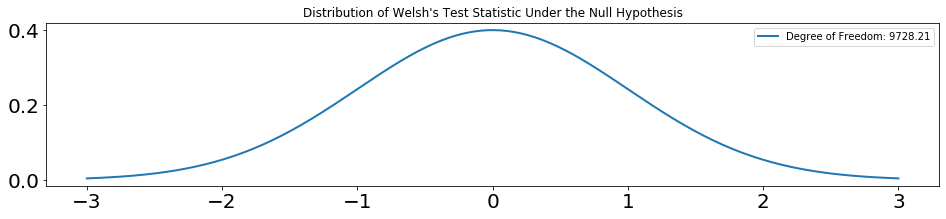

In [78]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dgf)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dgf))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Region')

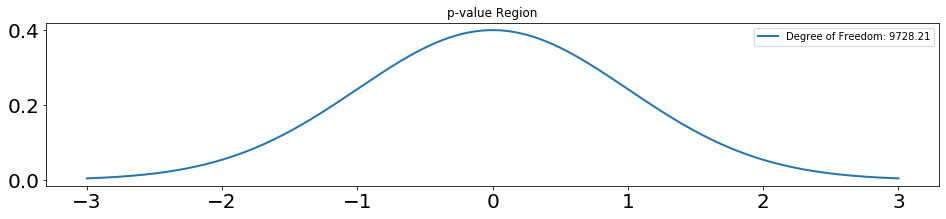

In [79]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dgf)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dgf))
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region")

In [80]:
test_statistic = welch_test_statistic(low_RIN_samples, high_RIN_samples)

p_value = 1 - students.cdf(test_statistic)
print("p-value for Nick average kickflip height greater than Matt: {:2.3f}".format(p_value))

p-value for Nick average kickflip height greater than Matt: 0.000


In [48]:
hypo_df3 = df[['SMATSSCR','SMRIN']]

In [49]:
hypo_df3.dropna(how='any', inplace=True)

/home/farzady/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


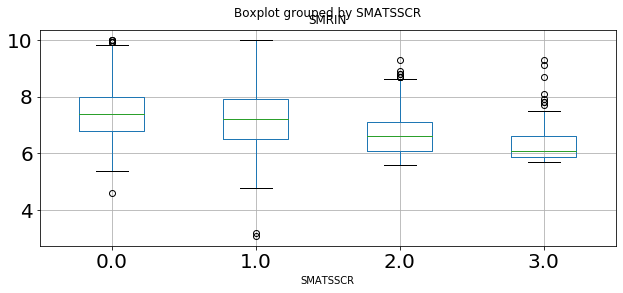

In [50]:
hypo_df3.boxplot(column = 'SMRIN', by = 'SMATSSCR', figsize = (10,4));

In [52]:
hypo_df3_low = hypo_df3[hypo_df3['SMRIN'] < 7.5]
hypo_df3_high = hypo_df3[hypo_df3['SMRIN'] >= 7.5]

In [53]:
hypo_df3_high

,SMATSSCR,SMRIN
168,1.0,7.8
169,0.0,8.8
170,1.0,7.8
171,1.0,9.0
172,1.0,7.5
...,...,...
13511,1.0,8.8
13513,1.0,9.4
13521,0.0,7.9
13522,1.0,8.8


In [55]:
samples_A = np.array(hypo_df3_low['SMATSSCR'])
samples_B = np.array(hypo_df3_high['SMATSSCR'])

In [57]:
samples_A.mean()

0.9734250429889011

In [58]:
samples_B.mean()

0.7373560340510766

In [87]:
def welch_test_statistic(samples_A, samples_B):
    numerator = np.mean(samples_A) - np.mean(samples_B)
    denominator_sq = (np.var(samples_A) / len(samples_A)) + (np.var(samples_B) / len(samples_B))
    return numerator / np.sqrt(denominator_sq)

In [88]:
test_statistic = welch_test_statistic(samples_A, samples_B)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: 20.76


In [89]:
def welch_satterhwaithe_df(samples_A, samples_B):
    ss1 = len(samples_A)
    ss2 = len(samples_B)
    df = (
        ((np.var(samples_A)/ss1 + np.var(samples_B)/ss2)**(2.0)) / 
        ((np.var(samples_B)/ss1)**(2.0)/(ss1 - 1) + (np.var(samples_B)/ss2)**(2.0)/(ss2 - 1))
    )
    return dgf

In [90]:
dgf = welch_satterhwaithe_df(samples_A, samples_B)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dgf))

Degrees of Freedom for Welch's Test: 9728.21


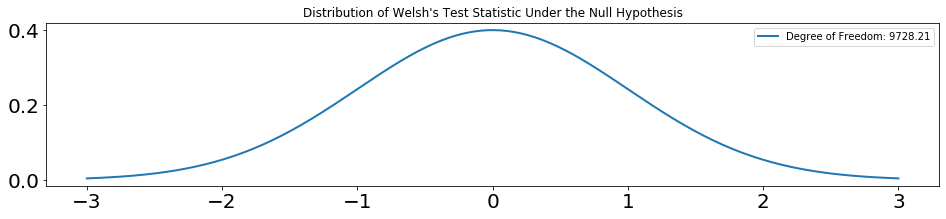

In [91]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dgf)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dgf))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

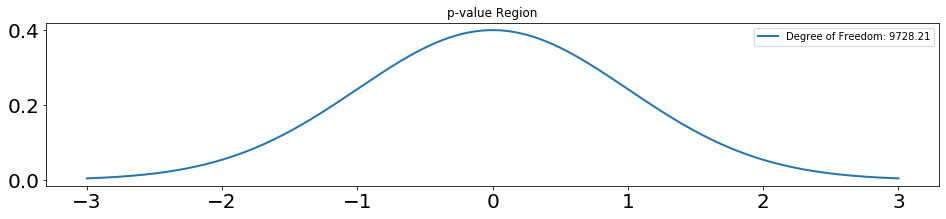

In [92]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dgf)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dgf))
_ = ax.fill_between(x, students.pdf(x), where=(x >= test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= -test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region");

In [54]:
test_statistic = welch_test_statistic(samples_A, samples_B)

p_value = 1 - students.cdf(test_statistic)
print("p-value: {:2.3f}".format(p_value))

p-value: 0.000
